<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/not_ruby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# define Deep ruby model

In [2]:
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D,SeparableConv2D,GlobalAveragePooling2D,Dense, Activation, BatchNormalization
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils

def DeepRuby(input_tensor=None, input_shape=None, alpha=1, classes=1000):

    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=True)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = Convolution2D(int(32*alpha), (3, 3), strides=(2, 2), padding='same')(img_input)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(32*alpha), (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(64 * alpha), (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(128 * alpha), (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(128 * alpha), (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(256 * alpha), (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(256 * alpha), (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    for _ in range(5):
        x = SeparableConv2D(int(512 * alpha), (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('elu')(x)

    x = SeparableConv2D(int(512 * alpha), (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)

    x = SeparableConv2D(int(1024 * alpha), (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    
    x = GlobalAveragePooling2D()(x)
    out = Dense(2, activation='softmax')(x)

    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs, out, name='deepRuby')

    return model

Using TensorFlow backend.


# create model

In [3]:
model = DeepRuby()
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

# Load data

In [4]:
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt
dir_path = '/content/drive/My Drive/Ruby_imgs/'

train_images = []
train_labels = []

for i in os.listdir(dir_path):
  file_name = dir_path + i
  img = image.load_img(file_name)
  img = img.resize((224,224))
  train_images.append(img)
  train_labels.append(1)# 1 is ruby

#train_df
train_df = pd.DataFrame()
train_df['img'] = train_images
train_df['label']=train_labels
train_df

,img,label
0,<PIL.Image.Image image mode=RGB size=224x224 a...,1
1,<PIL.Image.Image image mode=RGB size=224x224 a...,1
2,<PIL.Image.Image image mode=RGB size=224x224 a...,1
3,<PIL.Image.Image image mode=RGB size=224x224 a...,1
4,<PIL.Image.Image image mode=RGB size=224x224 a...,1


# set X ,y

In [0]:
#set X_train
X_train = train_df['img']
#set Y_train
Y_train = train_df["label"]

# IMG to array

In [6]:
img_data_list=[]

for img in X_train:
    x = img_to_array(img)  # this is a Numpy array with shape (224,224,3)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1,224,224,3)
    img_data_list.append(x)
print('total:',len(img_data_list))    
print('one of shape:',img_data_list[0].shape)

total: 5
one of shape: (1, 224, 224, 3)


# reshape

In [7]:
#prepare X and Y
import numpy as np
from keras.utils import np_utils
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data.reshape(-1, 224, 224, 3)
X=img_data
print('X.shape',X.shape)

# One-hot encoding
Y = np_utils.to_categorical(Y_train,num_classes = 2)
print('Y.shape',Y.shape)

X.shape (5, 224, 224, 3)
Y.shape (5, 2)


# Normalize the data

In [0]:
X = X / 255.0

# split

In [0]:
#split X_train, X_valid, Y_train, Y_valid
#from sklearn.model_selection import train_test_split
#X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1,random_state=42)

# Normalize the data
#X = X / 255.0
#X_valid = X_valid / 255.0
#print('X_train.shape',X_train.shape)
#print('Y_train.shape',Y_train.shape)
#print('X_valid.shape',X_valid.shape)
#print('Y_valid.shape',Y_valid.shape)

# Some examples

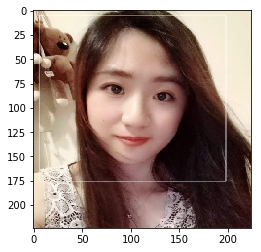

In [10]:
g = plt.imshow(X[3][:,:,:])

In [11]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
history = model.fit(X,Y,epochs=10,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
5/5 [==============================] - 5s 1s/step - loss: 0.6823 - acc: 0.6000
Epoch 2/10
5/5 [==============================] - 1s 191ms/step - loss: 1.5321 - acc: 0.4000
Epoch 3/10
5/5 [==============================] - 1s 190ms/step - loss: 0.5870 - acc: 0.4000
Epoch 4/10
5/5 [==============================] - 1s 189ms/step - loss: 0.3550 - acc: 1.0000
Epoch 5/10
5/5 [==============================] - 1s 190ms/step - loss: 0.2731 - acc: 1.0000
Epoch 6/10
5/5 [==============================] - 1s 195ms/step - loss: 0.1892 - acc: 1.0000
Epoch 7/10
5/5 [==============================] - 1s 186ms/step - loss: 0.1443 - acc: 1.0000
Epoch 8/10
5/5 [==============================] - 1s 191ms/step - loss: 0.1117 - acc: 1.0000
Epoch 9/10
5/5 [==============================] - 1s 194ms/step - loss: 0.0732 - acc: 1.0000
Epoch 10/10
5/5 [==============================] - 1s 193ms/step - loss:

In [13]:
[np.argmax(i) for i in Y]

[1, 1, 1, 1, 1]

In [14]:
predict = model.predict(X)
predict = [np.argmax(i) for i in predict]
predict

[1, 1, 1, 1, 1]

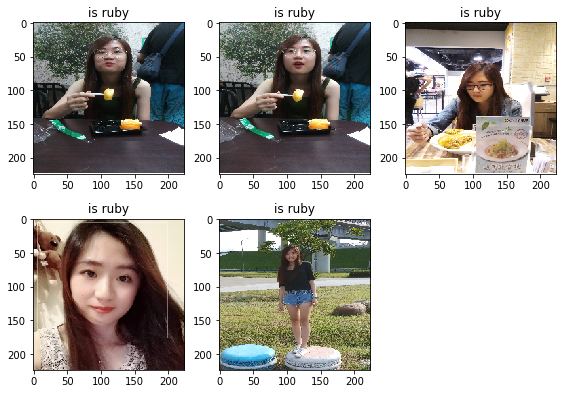

In [15]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,len(X)):
    plt.subplot(330 + (i+1))
    plt.imshow(X[i])
    if predict[i] == 1:
      title = 'is ruby'
    else:
      title = 'not ruby'
    plt.title(title)

In [20]:
table = pd.DataFrame()
predict = model.predict(X)
table['是ruby的機率'] = predict[:,1]
table['不是的機率'] = predict[:,0]
table

,是ruby的機率,不是的機率
0,0.990817,0.009183
1,0.993087,0.006913
2,0.982891,0.017109
3,0.996865,0.003135
4,0.984057,0.015943


# add not ruby img

(224, 224, 3)


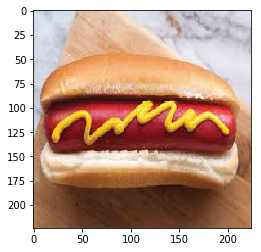

In [17]:
path = '/content/drive/My Drive/hot dog/hot dog.jpg'
img = image.load_img(path)
img = img.resize((224,224))
img = img_to_array(img) 
img = img/ 255.0
print(img.shape)
g = plt.imshow(img[:,:,:])

In [0]:
table = pd.DataFrame()
predict = model.predict(np.array([img]))
table['是ruby的機率'] = predict[:,1]
table['不是的機率'] = predict[:,0]

In [19]:
table

,是ruby的機率,不是的機率
0,0.965607,0.034393
